Cross-validation score: 0.8717435180872535


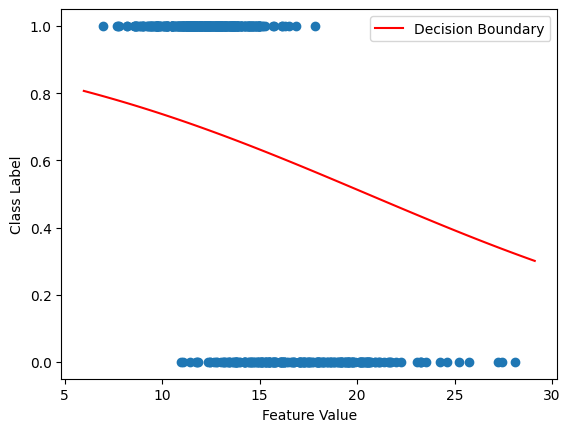

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Load the dataset
data = load_breast_cancer()
X = data.data[:, 0]  # Choose only one feature
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    J = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return J

def normal_equation(X, y):
    m = len(y)
    X = np.hstack((np.ones((m, 1)), X.reshape(m, 1)))
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

theta = normal_equation(X_train, y_train)

X_test = np.hstack((np.ones((len(X_test), 1)), X_test.reshape(len(X_test), 1)))
y_pred = np.round(sigmoid(X_test @ theta)).astype(int)
cm = confusion_matrix(y_test, y_pred)

X = np.hstack((np.ones((len(X), 1)), X.reshape(len(X), 1)))
scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print('Cross-validation score:', np.mean(scores))

# Create a meshgrid of the feature values
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = sigmoid(theta[0] + theta[1]*xx)

# Plot the data points and the decision boundary
plt.scatter(X[:, 1], y)
plt.plot(xx, yy, 'r-', label='Decision Boundary')
plt.xlabel('Feature Value')
plt.ylabel('Class Label')
plt.legend()
plt.show()